<h1 style=  font-size:30px;' align='center'>EDA + Missing Values + Outlier + ML</h1>

<p style ="font-size:25px; "><b>Dataset Description:</b></p>

* **This dataset comes from the UCI repository of machine learning databases. The task is to predict if an individual's annual income excceds 50,000 based on census data.**
* **Attribute Information:**
1. **age: continuous.**
2. **workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.**
3. **fnlwgt: continuous.**
4. **education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.**
5. **education-num: continuous.**
6. **marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.**
7. **occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.**
8. **relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.**
9. **race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.**
10. **sex: Female, Male**
11. **capital-gain: continuous.**
12. **capital-loss: continuous.**
13. **hours-per-week: continuous.**
14. **native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.**
15. **class: >50K, <=50K**

## Importing some neccessary libraries:

In [1]:
# It Will ignore some unneccessery warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

##  Importing and exploring the data:

In [3]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape # to get number of rows and columns

(48842, 15)

In [5]:
df.columns # TO get all columns names

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
# Number of numeric columns
numerics = ['int64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

6

In [8]:
# Numerical Columns
numerical_data = df.select_dtypes(['int64'])
numerical_cols = numerical_data.columns
print('Numerical Columns : {}'.format(list(numerical_cols)))

Numerical Columns : ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [9]:
# Categorical Columns
categorical_data = df.select_dtypes(['object'])
categorical_cols = categorical_data.columns
print('Categotical Columns : {}'.format(list(categorical_cols)))

Categotical Columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [10]:
# Quick statistical Analysis of the Dataset
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# Checking for null values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Exploratory Data Analysis and Visualization:

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

##  Univariate Analysis:

In [15]:
# Let's create a function to save time
def plot(clm):
    sns.set_style("darkgrid")
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[clm])
    plt.axvline(df[clm].mean(), color="brown", label="Mean")
    plt.legend(shadow=True,fontsize="larger")
    plt.subplot(1, 2, 2)
    sns.histplot(df[clm])
    plt.axvline(df[clm].mean(), color="black", label="Mean")
    plt.legend(shadow=True,fontsize="larger")

    skew = df[clm].skew()
    kurt = df[clm].kurt()
    print('Skewness:{}'.format(round(skew,2)))
    print('Kurtosis:{}'.format(round(kurt,2)))

<p style ="font-size:20px; color:brown"><b>Distribution of age:</b></p>

AttributeError: module 'seaborn' has no attribute 'histplot'

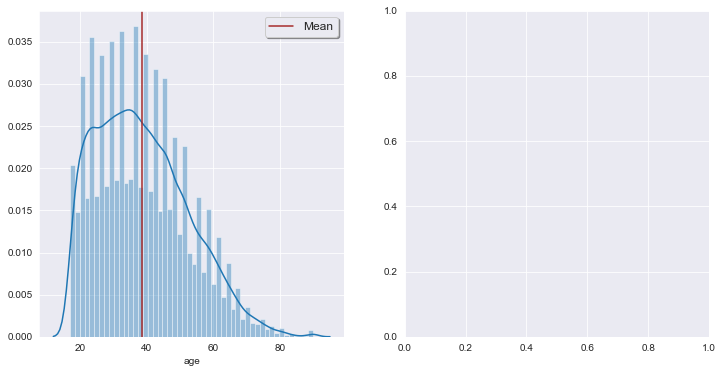

In [18]:
plot('age')

**From the above plots as we can say that it's having a thick tail towards the right side looks like a positively skewed distribution**

<p style ="font-size:20px; color:brown"><b>Distribution of fnlwgt:</b></p>

In [ ]:
 plot('fnlwgt')

**From the above plots as we can say that it's having a long tail towards the right side looks like a log normal distribution**

<p style ="font-size:20px; color:brown"><b>Distribution of educational-num:</b></p>

In [ ]:
 plot('educational-num')

<p style ="font-size:20px; color:brown"><b>Distribution of capital-gain:</b></p>

In [ ]:
 plot('capital-gain')

**From the above plots as we can say that it's having a long tail towards the right side looks like a Pareto distribution**

<p style ="font-size:20px; color:brown"><b>Distribution of capital-loss:</b></p>

In [ ]:
 plot('capital-loss')

**From the above plots as we can say that it's having a long tail towards the right side looks like a Pareto distribution**

<p style ="font-size:20px; color:brown"><b>Distribution of hours-per-week:</b></p>

In [ ]:
 plot('hours-per-week')

<p style ="font-size:20px; color:brown"><b>Ploting the workclass to find the count:</b></p>

In [ ]:
df['workclass']

In [ ]:
unique_workclass = df['workclass'].unique()
len(unique_workclass) 

In [ ]:
workclass_count = df['workclass'].value_counts()
workclass_count

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
workclass_count.plot(kind='bar' , width=0.9)
plt.xlabel('workclass')
plt.ylabel('Count')

**From the above plot We can say the majority of Workclass belongs to the Private Sector. Very few percent of Workclass belongs to other categories.**

<p style ="font-size:20px; color:brown"><b>Ploting the education to find the count:</b></p>

In [ ]:
df['education']

In [ ]:
unique_education = df['education'].unique()
len(unique_education) 

In [ ]:
education_count = df['education'].value_counts()
education_count

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
education_count.plot(kind='bar' , width=0.9)
plt.xlabel('education')
plt.ylabel('Count')

**From the above plot We can say that Highest Education level of an Individual is HS-grad.**

<p style ="font-size:20px; color:brown"><b>Ploting the marital-status to find the count:</b></p>

In [ ]:
df['marital-status']

In [ ]:
unique_maritalstatus = df['marital-status'].unique()
len(unique_maritalstatus) 

In [ ]:
maritalstatus_count = df['marital-status'].value_counts()
maritalstatus_count

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
maritalstatus_count.plot(kind='bar' , width=0.9)
plt.xlabel('marital-status')
plt.ylabel('Count')

**From the above plot We can say that Married-civ-spouse is the highest in the population**

<p style ="font-size:20px; color:brown"><b>Ploting the occupation to find the count:</b></p>

In [ ]:
df['occupation']

In [ ]:
unique_occupation = df['occupation'].unique()
len(unique_occupation) 

In [ ]:
occupation_count = df['occupation'].value_counts()
occupation_count

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
occupation_count.plot(kind='bar' , width=0.9)
plt.xlabel('occupation')
plt.ylabel('Count')

**From the above plot we can say that the most of the occupation follows is Prof-specialty**

<p style ="font-size:20px; color:brown"><b>Ploting the relationship to find the count:</b></p>

In [ ]:
df['relationship']

In [ ]:
unique_relationship = df['relationship'].unique()
len(unique_relationship) 

In [ ]:
relationship_count = df['relationship'].value_counts()
relationship_count

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
relationship_count.plot(kind='bar' , width=0.9)
plt.xlabel('relationship')
plt.ylabel('Count')

<p style ="font-size:20px; color:brown"><b>Ploting the race to find the count:</b></p>

In [ ]:
df['race']

In [ ]:
unique_race = df['race'].unique()
len(unique_race) 

In [ ]:
race_count = df['race'].value_counts()
race_count

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
race_count.plot(kind='bar' , width=0.9)
plt.xlabel('race')
plt.ylabel('Count')

<p style ="font-size:20px; color:brown"><b>Ploting the gender to find the count:</b></p>

In [ ]:
df['gender']

In [ ]:
unique_gender = df['gender'].unique()
len(unique_gender) 

In [ ]:
gender_count = df['gender'].value_counts()
gender_count

In [ ]:
plt.figure(figsize=(15,8))
labels=['Male','Female']
data=df.gender.value_counts()
plt.pie(data,labels=labels,autopct="%.1f%%")
plt.show()

<p style ="font-size:20px; color:brown"><b>Ploting the native-country to find the count:</b></p>

In [ ]:
df['native-country']

In [ ]:
unique_native_country = df['native-country'].unique()
len(unique_native_country) 

In [ ]:
native_country_count = df['native-country'].value_counts()
native_country_count

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
native_country_count[:20].plot(kind='bar' , width=0.9)
plt.xlabel('native-country')
plt.ylabel('Count')

<p style ="font-size:20px; color:brown"><b>Ploting the income to find the count:</b></p>

In [ ]:
df['income']

In [ ]:
unique_income = df['income'].unique()
len(unique_income) 

In [ ]:
income_count = df['income'].value_counts()
income_count

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
income_count.plot(kind='bar' , width=0.9)
plt.xlabel('income')
plt.ylabel('Count')

<p style ="font-size:25px; color:blue"><b>Bivariate Analysis:</b></p>

<p style ="font-size:20px; color:brown"><b>Workclass by Age Distribution:</b></p>

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y='workclass',x='age',data=df)
plt.title('Workclass by Age')
plt.show()

<p style ="font-size:20px; color:brown"><b>Marital Status by Age Distribution:</b></p>

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='marital-status',y='age',ci=None,data=df)
plt.title('Marital Status with Respect to Age')
plt.xticks(rotation=45)
plt.show()

<p style ="font-size:20px; color:brown"><b>Income with Respect to age:</b></p>

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.countplot(x=df['age'][:200],hue='income',data=df)
plt.title('Income with Respect to age')
plt.show()

<p style ="font-size:20px; color:brown"><b>Income with Respect to Relationship Status:</b></p>

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(x='relationship',hue='income',data=df)
plt.title('Income with Respect to Relationship')
plt.show()

<p style ="font-size:20px; color:brown"><b>Job Occupation with Respect to Income:</b></p>

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(x='occupation',hue='income',data=df)
plt.title('Income Distribution with Respect to Job Occupation')
plt.xticks(rotation=90)
plt.show()

<p style ="font-size:20px; color:brown"><b>Income with Respect to Education Level:</b></p>

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(x='education',hue='income',data=df)
plt.title('Income with Respect to Education')
plt.xticks(rotation=90)
plt.show()

<p style ="font-size:25px; color:blue"><b>Feature Engineering:</b></p>

**At the time of analysing the dataset we have came across with lot's of missing values. So now we have to tackel those to clean the data**

In [ ]:
# As we can see the null values are exists in the dataset as '?'. so I'll replace those with nan values.
columns = list(df.columns)
for col in columns:    
    df[col] = df[col].replace('?',np.nan)

In [ ]:
df.isnull().any()

**As we can see there are some null values in the columns**

In [ ]:
# Dropping the null values
df = df.loc[df['workclass'].notnull(), :]
df = df.loc[df['occupation'].notnull(), :]
df = df.loc[df['native-country'].notnull(), :]

In [ ]:
df.isnull().any() 

**As We can see now there is no null values**

In [ ]:
df.columns

In [ ]:
# We can drop some unneccessary columns to keep our dataset clean
df.drop(['fnlwgt','capital-gain','capital-loss'],axis=1,inplace=True)
df.head()

In [ ]:
#let's convert the value of the income column to get dummies
df['income'] = df['income'].replace({'<=50K': 'low', '>50K': 'high'})

In [ ]:
df.loc[df['native-country'] != 'United-States', 'native-country'] = 'Other-country'

In [ ]:
#Since 72% of the citizens living in USA are White American(note: the U.S. the U.S. Source sensus), we will reduce race category into two categories White and others.It will also helpful when we will do dummies it will reduce the no the columns in the dataset.
df.loc[df['race'] != 'White', 'race'] = 'Other'

In [ ]:
df.head()

In [ ]:
# Number of Outliers in each Numerical columns

numeric_data = df.select_dtypes(['int64','float64']).columns

outliers = pd.DataFrame(columns=['Feature','Number of Outliers','Percentage']) # Creating a new dataframe
    
for column in list(numeric_data): # Iterating thorough each feature 
   
    q1 = df[column].quantile(0.25)  # first quartile
    q3 = df[column].quantile(0.75)  # third quartile
            
    iqr = q3 - q1 #Inter Quantile Range
        
    lower_value = q1 - (1.5*iqr)        
    upper_value = q3 + (1.5*iqr)
        
     
    total_outlier = df[(df[column] < lower_value) | (df[column] > upper_value)].shape[0]    
    percent = (total_outlier / len(df[column])) * 100
        
    outliers = outliers.append({'Feature':column,'Number of Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

**As we can see in the hours-per-week column there more outliers that we have to treat**

In [ ]:
# Let's see the boxblot of hours-per-week
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.boxplot(df['hours-per-week'])
plt.show()

In [ ]:
#let's plot a QQ plot to check the normality
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
stats.probplot(df['hours-per-week'],dist='norm', plot=plt)
plt.show()

In [ ]:
# Let's use boxcox transformation
pr_1 , l = stats.boxcox(df['hours-per-week'])
print(l)

In [ ]:
# Ploting the Q-Q plot to see the normality of the transformed column
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
stats.probplot(pr_1 , dist='norm' , plot=plt)
plt.show()

**From the above plot we can say that box-cox transformation is not helpfull to this column**

In [ ]:
# Mean Imputation in column hours-per-week

q1 = df['hours-per-week'].quantile(0.25)
q3 = df['hours-per-week'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df['hours-per-week'])
for i in df['hours-per-week']:
    if i > Upper_tail or i < Lower_tail:
            df['hours-per-week'] = df['hours-per-week'].replace(i, m)

In [ ]:
# Let's see the boxplot
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot after mean imputation")
plt.show()

<p style ="font-size:25px; color:blue"><b>Conclusion of EDA:</b></p>

1. **There were too much outliers in the columns which were treated well**
2. **There were missing values in the dataset as '?' which were treated**
3. **The data was pretty much skewed which I handled well**
4. **The dataset is now nit and clean to perform the machine learning**

<p style ="font-size:25px; color:blue"><b>Feature Transformation:</b></p>

In [ ]:
df.columns

<p style ="font-size:18px; color:brown; text-decoration:underline;"><b>Column Standardization for Numerical Features:</b></p>

In [ ]:
# Numerical Columns
numerical_data = df.select_dtypes(['int64','float64'])
numerical_cols = numerical_data.columns
print('Numerical Columns : {}'.format(list(numerical_cols)))

In [ ]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
numerical = df.select_dtypes(include=['int64', 'float64'])   
df_numerical = pd.DataFrame(scaler.fit_transform(numerical),columns = numerical.columns)
df_numerical.head()

<p style ="font-size:18px; color:brown; text-decoration:underline;"><b>Column Standardization for Categorical Features:</b></p>

In [ ]:
# One Hot Encoding the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [ ]:
categorical = df.select_dtypes('object')
df_categorical = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))
df_categorical.head()

In [ ]:
#Final dataset 
final_df = pd.concat([df_numerical,df_categorical], axis = 1)
final_df.head()

<p style ="font-size:25px; color:blue"><b>Splitting the columns:</b></p>

In [ ]:
x = final_df.iloc[:,:-1] 
y = final_df.iloc[:,-1] #target variable

In [ ]:
x

In [ ]:
y

<p style ="font-size:25px; color:blue"><b>Splitting the dataset into Train and Test data:</b></p>

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.3)

<p style ="font-size:25px; color:blue"><b>Applying the Machine Learning Models:</b></p>

<p style ="font-size:18px; color:brown; text-decoration:underline;"><b>Logistic Regression:</b></p>

In [ ]:
from sklearn.linear_model import LogisticRegression

Logistic_model = LogisticRegression()

Logistic_model.fit(x_train, y_train)

y_pred_logistic = Logistic_model.predict(x_test)

from sklearn import metrics

Logistic_Acc= round(metrics.accuracy_score(y_test, y_pred_logistic),2)*100

Logistic_Acc

<p style ="font-size:18px; color:brown; text-decoration:underline;"><b>DecisionTreeClassifier:</b></p>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier(criterion='entropy',random_state=0)

DTC_model.fit(x_train,y_train)

y_pred_DTC = DTC_model.predict(x_test)

DTC_Acc = round(metrics.accuracy_score(y_test, y_pred_DTC),2)*100

DTC_Acc

<p style ="font-size:18px; color:brown; text-decoration:underline;"><b>K Nearest Neighbour Classifier:</b></p>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=3)

knn_model.fit(x_train,y_train)

y_pred_knn=knn_model.predict(x_test)

Knn_Acc = round(knn_model.score(x_test,y_test),2)*100

Knn_Acc

<p style ="font-size:18px; color:brown; text-decoration:underline;"><b>Random Forest Classifier:</b></p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

RF_model.fit(x_train, y_train)

y_pred_RF = RF_model.predict(x_test)

RF_Acc = round(RF_model.score(x_test,y_test),2)*100

RF_Acc

<p style ="font-size:18px; color:brown; text-decoration:underline;"><b>Extra Tree Classifier:</b></p>

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ETC_model = ExtraTreesClassifier(n_estimators=100, random_state=0)

ETC_model.fit(x_train, y_train)

y_pred_ETC = ETC_model.predict(x_test)

ETC_Acc = round(ETC_model.score(x_test,y_test),2)*100

ETC_Acc

<p style ="font-size:18px; color:brown; text-decoration:underline;"><b>Gradient Boosting Classifier:</b></p>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier(random_state = 0)

GBC_model.fit(x_train, y_train)

GBC_Acc = round(GBC_model.score(x_test,y_test),2)*100

GBC_Acc

<p style ="font-size:25px; color:blue"><b>Performance of each Model:</b></p>

In [ ]:
models = {
    'Logistic Regression':Logistic_Acc,
    'DecisionTreeClassifier':DTC_Acc,
    'KNeighborsClassifier':Knn_Acc,
    'RandomForestClassifier':RF_Acc,
    'ExtraTreesClassifier':ETC_Acc,
    'GradientBoostingClassifier':GBC_Acc,
}

models_score = pd.DataFrame.from_dict(data = models, orient='index',columns=['Score'])

models_score.sort_values(by='Score', ascending=False)